In [127]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [128]:
dataset = pd.read_csv('Te(zy100).csv')
x = dataset['x']
y = dataset['y']

In [129]:
def func(x, *params):

    #paramsの長さでフィッティングする関数の数を判別。
    num_func = int(len(params)/3)

    #ガウス関数にそれぞれのパラメータを挿入してy_listに追加。
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
        y_list.append(y)

    #y_listに入っているすべてのガウス関数を重ね合わせる。
    y_sum = np.zeros_like(x)
    for i in y_list:
        y_sum = y_sum + i

    #最後にバックグラウンドを追加。
    y_sum = y_sum + params[-1]

    return y_sum

In [130]:
def fit_plot(x, *params):
    num_func = int(len(params)/3)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2) + params[-1]
        y_list.append(y)
    return y_list

In [131]:
#初期値のリストを作成
#[amp,ctr,wid]
guess = []
guess.append([80, 7432, 1])
guess.append([40, 7440, 1])

#バックグラウンドの初期値
background = 1

#初期値リストの結合
guess_total = []
for i in guess:
    guess_total.extend(i)
guess_total.append(background)

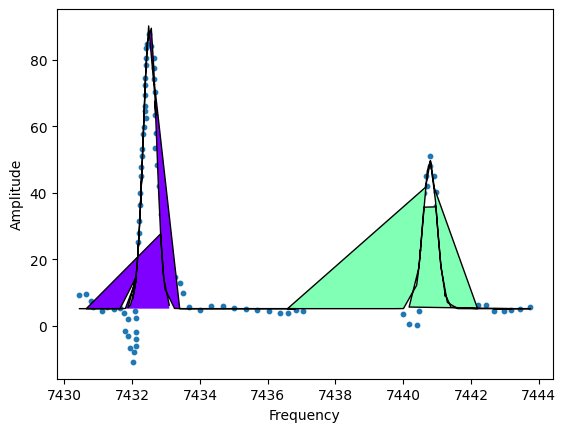

In [132]:
popt, pcov = curve_fit(func, x, y, p0=guess_total)

plt.xlabel('Frequency')
plt.ylabel('Amplitude')

fit = func(x, *popt)
plt.scatter(x, y, s=10)
plt.plot(x, fit , ls='-', c='black', lw=1)

y_list = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n,i in enumerate(y_list):
    plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=1)

In [133]:
# フィッティングされたパラメータを表示
print("Fitted Parameters:")
for i in range(int(len(popt) / 3)):
    print(f"Gaussian {i + 1}: Amplitude={popt[3 * i]}, Center={popt[3 * i + 1]}, Width={popt[3 * i + 2]}")
print(f"Background: {popt[-1]}")

Fitted Parameters:
Gaussian 1: Amplitude=86.46671154789466, Center=7432.520805766856, Width=-0.27337194163502393
Gaussian 2: Amplitude=44.60136024978027, Center=7440.789970951463, Width=-0.28944027420490237
Background: 5.112648766197286
